In [23]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [7]:
main_dir = "F:/projects/hirdl/Kidney Dataset"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")
val_dir = os.path.join(main_dir, "valid")
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [8]:
for dir_path, dir_names, file_names in os.walk(main_dir):
    print(f"There are {len(dir_path)} directories and {len(file_names)} images in '{dir_path}'.")

There are 32 directories and 0 images in 'F:/projects/hirdl/Kidney Dataset'.
There are 37 directories and 0 images in 'F:/projects/hirdl/Kidney Dataset\test'.
There are 42 directories and 556 images in 'F:/projects/hirdl/Kidney Dataset\test\Cyst'.
There are 44 directories and 762 images in 'F:/projects/hirdl/Kidney Dataset\test\Normal'.
There are 43 directories and 207 images in 'F:/projects/hirdl/Kidney Dataset\test\Stone'.
There are 43 directories and 342 images in 'F:/projects/hirdl/Kidney Dataset\test\Tumor'.
There are 38 directories and 0 images in 'F:/projects/hirdl/Kidney Dataset\train'.
There are 43 directories and 2597 images in 'F:/projects/hirdl/Kidney Dataset\train\Cyst'.
There are 45 directories and 3553 images in 'F:/projects/hirdl/Kidney Dataset\train\Normal'.
There are 44 directories and 963 images in 'F:/projects/hirdl/Kidney Dataset\train\Stone'.
There are 44 directories and 1599 images in 'F:/projects/hirdl/Kidney Dataset\train\Tumor'.
There are 38 directories and 0 

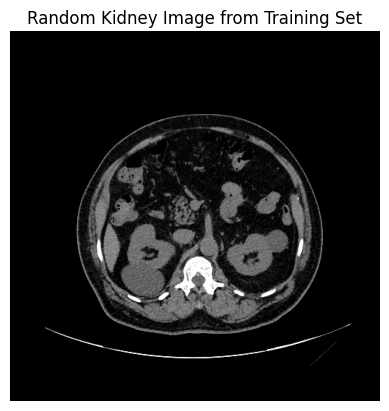

In [17]:
#show random image from training set
import random
train_kidney_dir = os.path.join(train_dir, "Cyst")
train_norm_kidney_dir = os.path.join(train_dir, "Normal")
train_stone_kidney_dir = os.path.join(train_dir, "Stone")
train_stone_tumor_kidney_dir = os.path.join(train_dir, "Tumor")
random_kidney_img = random.choice(os.listdir(train_kidney_dir))
img = mpimg.imread(os.path.join(train_kidney_dir, random_kidney_img))
plt.imshow(img)
plt.title("Random Kidney Image from Training Set")
plt.axis(False)
plt.show()


In [28]:
import pathlib
import numpy as np
import pandas as pd
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = pd.DataFrame(class_names, columns=["Class Names"])
print(class_names)

  Class Names
0        Cyst
1      Normal
2       Stone
3       Tumor


In [71]:
# random image function

def view_rendom_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(f"This image is from class {target_class}")
    plt.axis('off')
    plt.show()
    print(f"Image shape: {img.shape}")
    return img


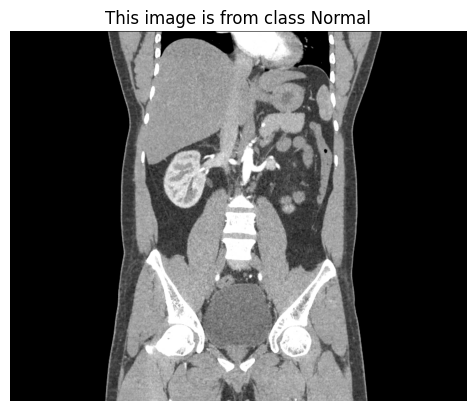

Image shape: (670, 828, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(670, 828, 3), dtype=uint8)

In [72]:
import random
view_rendom_image(target_dir=train_dir,
                        target_class=random.choice(class_names["Class Names"].values))

In [ ]:
#show 9 random images function
def view_9_images(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    plt.figure(figsize=(10,10))
    for i in range(9):
        random_image = random.sample(os.listdir(target_folder), 1)
        img = mpimg.imread(os.path.join(target_folder, random_image[0]))
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(f"Class: {target_class}")
        plt.axis('off')
    plt.show()

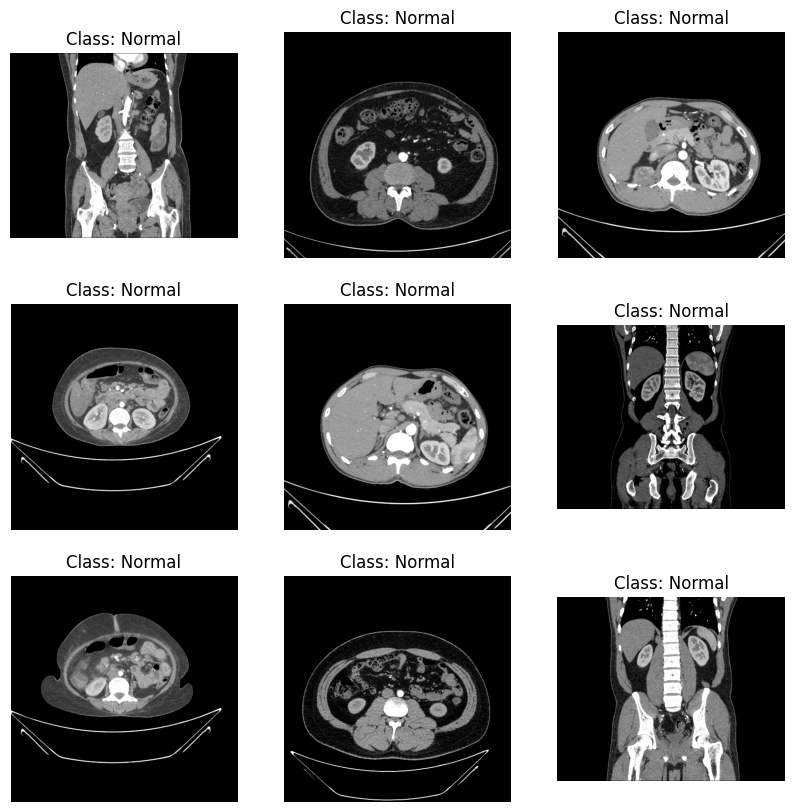

In [75]:
import random
view_9_images(target_dir=train_dir,
               target_class=random.choice(class_names["Class Names"].values))

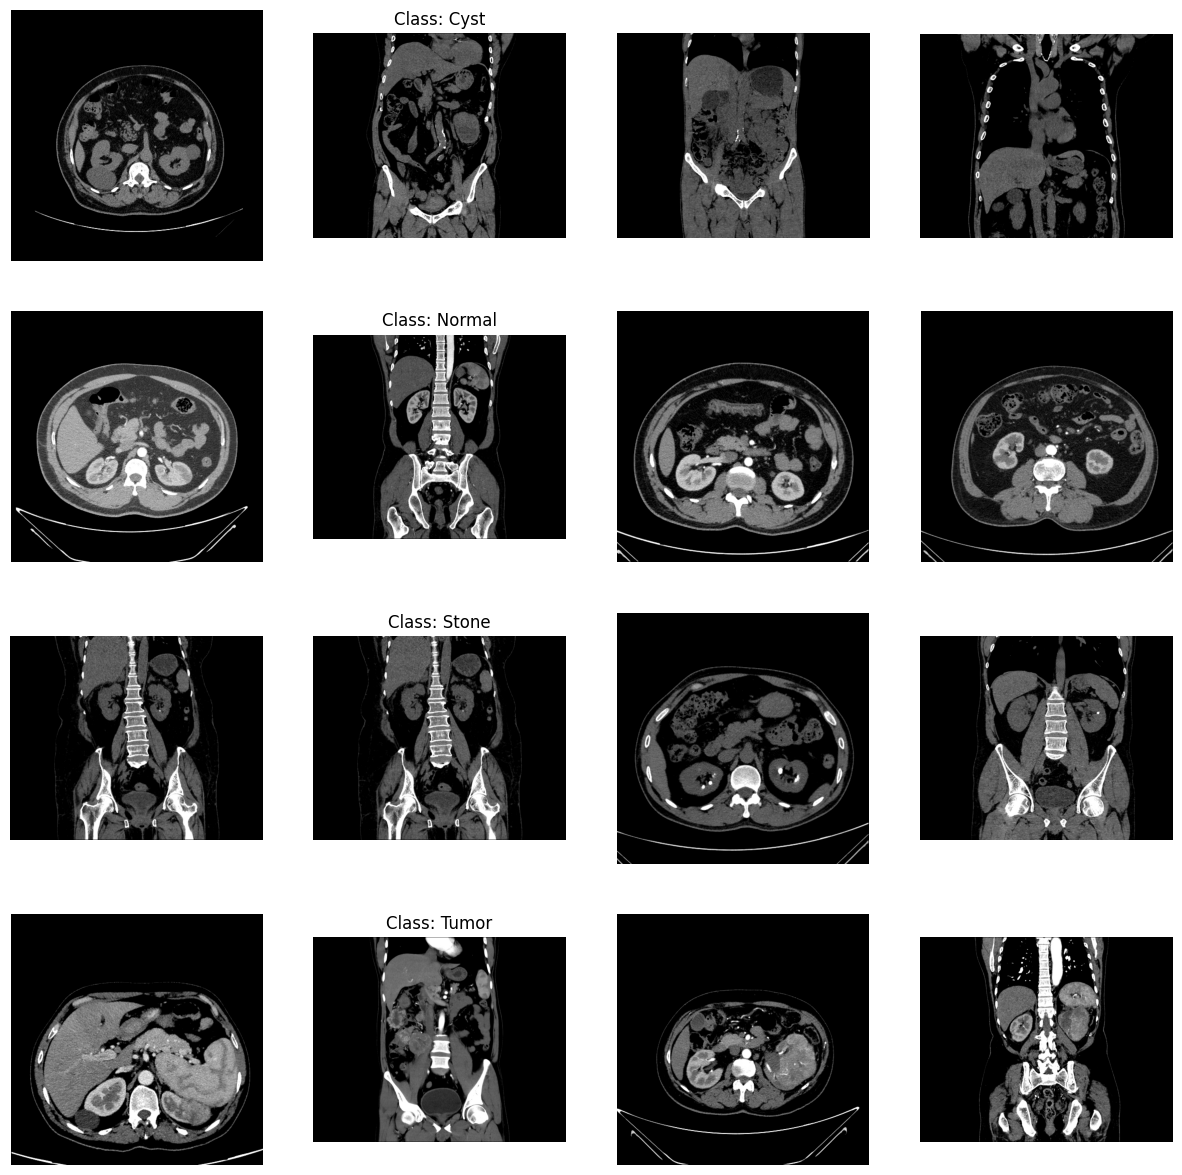

In [78]:
# show 4 random images from each class
def view_4_images_per_class(target_dir, class_names):
    plt.figure(figsize=(15,15))
    for class_index, target_class in enumerate(class_names["Class Names"].values):
        target_folder = os.path.join(target_dir, target_class)
        for i in range(4):
            random_image = random.sample(os.listdir(target_folder), 1)
            img = mpimg.imread(os.path.join(target_folder, random_image[0]))
            plt.subplot(len(class_names), 4, class_index * 4 + i + 1)
            plt.imshow(img)
            if i == 1:
                plt.title(f"Class: {target_class}")
            plt.axis('off')
    plt.show()
view_4_images_per_class(target_dir=train_dir, class_names=class_names)


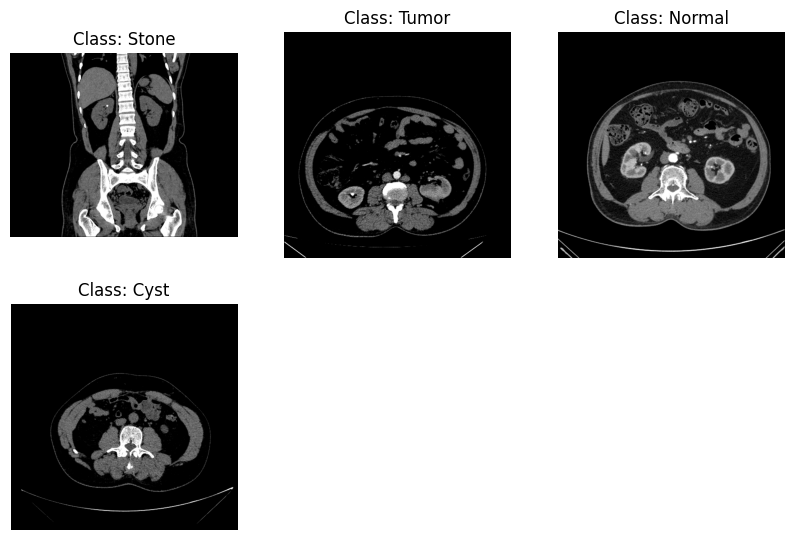

In [87]:
#show n random images from different classes
def view_n_images_different_classes(target_dir, class_names):
    plt.figure(figsize=(10,10))
    num_classes = min(9, len(class_names))
    selected_classes = random.sample(list(class_names["Class Names"].values), num_classes)
    for i, target_class in enumerate(selected_classes):
        target_folder = os.path.join(target_dir, target_class)
        images = os.listdir(target_folder)
        num_images = min(1, len(images))
        random_image = random.sample(images, num_images)
        img = mpimg.imread(os.path.join(target_folder, random_image[0]))
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(f"Class: {target_class}")
        plt.axis('off')
    plt.show()
view_n_images_different_classes(target_dir=train_dir, class_names=class_names)